In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

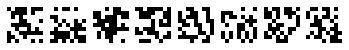

In [2]:
# Generate white noise samples

alphabet_len = 8
im_size = (9, 9)
np.random.seed(42)

white_noise_dataset = np.random.randint(0, 2, 
                                        size=(alphabet_len, im_size[0] * im_size[1]), 
                                        dtype='int') * 2 - 1

noized_dataset = uti.noisify_dataset(white_noise_dataset)

for i in range(alphabet_len):
    ax = plt.subplot(1, alphabet_len, i + 1)
    uti.show_letter(white_noise_dataset[i], ax)


[True, True, True, True, True, True, True, True]


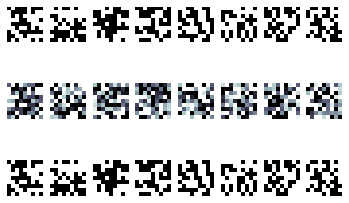

In [15]:
hop_net = hopfield.HopfieldNetwork()
pm = hop_net.run(white_noise_dataset,
                iterations=1000, 
                noise_level=0.5, 
                n_test_samples=alphabet_len,
                lr="hebbian", 
                af="sync_tanh")

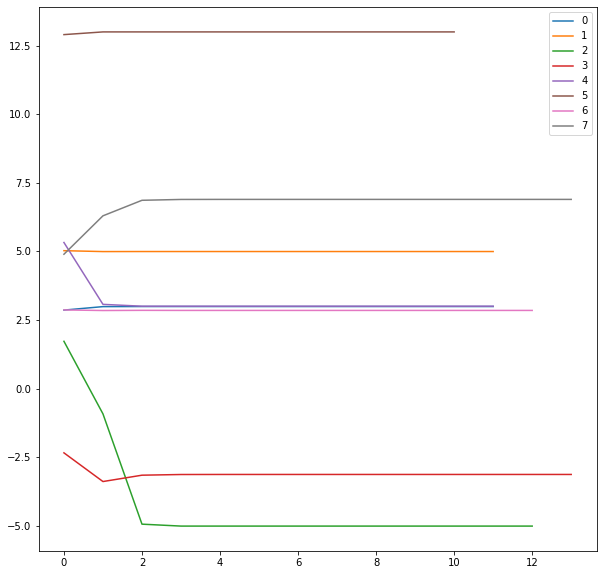

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

for i, energy in enumerate(pm.sequence_energy):
    energy_states = energy[:1000]

    # ax energy accuracy
    ax_energy_time = axs
    ax_energy_time.plot(range(len(energy_states)), energy_states, label=f"{i}")
plt.legend()
# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")

In [17]:
# pms = [pm]
# neurons = [28 * 28]
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# # 1
# ax_num_acc = axs[0][0]
# ax_num_acc.plot(neurons, [np.mean(pm.is_correct) for pm in pms])
# ax_num_acc.set_xlabel('#Neurons')
# ax_num_acc.set_ylabel("Accuracy")
# ax_num_acc.set_xticks(neurons)
# ax_num_acc.set_title(f"#Neuron v.s. Accuracy (#trial = {n_test_samples}, #input_sample={ninput})")


# # ax timestep accuracy
# ax_time_acc = axs[0][1]
# ax_time_acc.scatter([np.mean(pm.time) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_time_acc.set_xlabel(f"Mean timestamp on {n_test_samples} trials")
# ax_time_acc.set_ylabel("Accuracy")
# ax_time_acc.set_title("Mean timestamp v.s. Accuracy")

# # ax energy accuracy
# ax_energy_acc = axs[1][0]
# ax_energy_acc.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_energy_acc.set_xlabel(f"Mean energy on {n_test_samples} trials")
# ax_energy_acc.set_ylabel("Accuracy")
# ax_energy_acc.set_title("Mean energy v.s. Accuracy")

# # ax energy accuracy
# ax_energy_time = axs[1][1]
# ax_energy_time.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.time) for pm in pms])
# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")
